<h1><center>Tuwaiq Acadmey</center></h1>
<h2><center>Data Science and Machine Learning Bootcamp</center></h2>
<h2><center>Project 4 - Advanced Regression Techniques</center></h2>

In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
houses = pd.read_csv('Data/train.csv')
houses_test = pd.read_csv('Data/test.csv')

In [4]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Tasks to do:
1. Data profiling Today -
2. Data Quality Checking
   - Relevance (Choosing the most important features) Tomorrow RSME 0.00044 
   - Uniqueness (duplicated values) Tomorrow 
   - Completeness (null values) Monday
   - Accuracy (outliters) Monday
3. Model building Rest of the days

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Uniqueness

In [6]:
houses.duplicated().sum()

0

In [7]:
houses['Id'].duplicated().sum()

0

# Completeness

In [8]:
houses['LotFrontage'].isnull().sum()

259

In [9]:
# Checking the precentage of null values in LotFrontage
(houses['LotFrontage'].isnull().sum())/len(houses)*100

17.73972602739726

In [10]:
# Filling in null values with median
houses['LotFrontage'] = houses.groupby('Neighborhood')['LotFrontage'].transform(
lambda x: x.fillna(x.median()))

In [11]:
houses[houses['Alley'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
houses['Alley'] = houses['Alley'].fillna('No alley access')

In [13]:
#investigate all the elemenys within each feature

for column in houses:
    if houses[column].dtype == 'object':
        unique_vals = houses[column].unique()
    else:
        unique_vals = np.unique(houses[column])

    nr_values = len(unique_vals)


    if nr_values <= 10:
        print(f'{column} : {nr_values} -- {unique_vals}')
    else:
        print(f'{column} : {nr_values}')

Id : 1460
MSSubClass : 15
MSZoning : 5 -- ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage : 115
LotArea : 1073
Street : 2 -- ['Pave' 'Grvl']
Alley : 3 -- ['No alley access' 'Grvl' 'Pave']
LotShape : 4 -- ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 -- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 -- ['AllPub' 'NoSeWa']
LotConfig : 5 -- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 -- ['Gtl' 'Mod' 'Sev']
Neighborhood : 25
Condition1 : 9 -- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 -- ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 -- ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 -- ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : 10 -- [ 1  2  3  4  5  6  7  8  9 10]
OverallCond : 9 -- [1 2 3 4 5 6 7 8 9]
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6 -- ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 -- ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&G

In [14]:
#21-40
houses['RoofStyle'].unique() # Doesn't have any issue

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [15]:
# Roof material -> What is the roof made of?
houses['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [16]:
houses['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [17]:
# Since there are no null values in this column, the other here indicates two important points:
# Other -> the house is covered with a second extrior of a material that is not recorded.
# Other -> All the houses are covered with two exteriors which is a weird fact if it is true.
# It could also mean that other included both that don't have a 2nd extrior and those with unrecorded materials.
houses['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [18]:
#Masonry veneer refers to a layer of masonry material (like brick, stone, or concrete blocks) 
#that is applied to the exterior of a building as a decorative or protective covering. 
#It doesn't serve as the main structural component of the wall but adds both aesthetic value and durability.

#It's not mandatory to have it
# NaN -> houses that done havy it
houses['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [19]:
houses['MasVnrArea'].isna().sum()

8

In [20]:
# We see here that those that don't have any Masonry Veneer also don't Masnory Veneer area therefore
# they should be filled with 0
pd.set_option('display.max_columns', None)
houses[houses['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,65.0,7851,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,74.0,32668,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [21]:
houses['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [22]:
houses['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [23]:
houses[houses['ExterCond'] == 'Po']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
250,251,30,RL,55.0,5350,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500


In [24]:
houses['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [25]:
houses['BsmtQual'].isna().sum()

37

In [26]:
houses['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [27]:
houses[houses['BsmtQual'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No alley access,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,73.0,8544,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Pl

In [28]:
houses['BsmtCond'].isna().sum()

37

In [29]:
houses['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [30]:
houses[houses['BsmtCond'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No alley access,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,73.0,8544,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Pl

In [31]:
#There is an additional null value here ...
houses['BsmtExposure'].isna().sum()

38

In [32]:
# Checking null values in BsmtExposure column
# row 948 -> BsmtQual (value), BsmtCond (value), BsmtExposure (null value)
houses[houses['BsmtExposure'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No alley access,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,73.0,8544,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Pl

In [33]:
#No -> No Exposure
#NaN -> No Basement 
houses['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [34]:
houses['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [35]:
houses['BsmtFinType1'].isna().sum()

37

In [36]:
houses['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [37]:
houses['BsmtFinSF1'].isna().sum()

0

In [38]:
houses['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [39]:
# Here 0 -> unfinisied basements & no basements
houses[houses['BsmtFinSF1']==0].head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,9,50,RM,51.0,6120,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
13,14,20,RL,91.0,10652,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
15,16,45,RM,51.0,6120,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
17,18,90,RL,72.0,10791,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
20,21,60,RL,101.0,14215,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
22,23,20,RL,75.0,9742,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1777,1777,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,534,TA,TA,Y,171,159,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000
25,26,20,RL,110.0,14230,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,Ex,Y,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300


In [40]:
# There is an additioanl null value
houses['BsmtFinType2'].isna().sum()

38

In [41]:
houses['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [42]:
houses[houses['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No alley access,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,73.0,8544,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,H

In [43]:
houses['BsmtFinSF2'].isna().sum()

0

In [44]:
houses['BsmtFinSF2'].unique()

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175,  820, 1474,  264,  479,  147,  232,  380,  544,  294,  258,
        121,  391,  531,  344,  539,  713,  210,  311, 1120,  165,  532,
         96,  495,  174, 1127,  139,  202,  645,  123,  551,  219,  606,
        612,  480,  182,  132,  336,  468,  287,   35,  499,  723,  119,
         40,  117,  239,   80,  472,   64, 1057,  127,  630,  128,  377,
        764,  345, 1085,  435,  823,  500,  290,  324,  634,  411,  841,
       1061,  466,  396,  354,  149,  193,  273,  465,  400,  682,  557,
        230,  106,  791,  240,  547,  469,  177,  108,  600,  492,  211,
        168, 1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,
        173,  972,  105,  420,  546,  334,  352,  872,  110,  627,  163,
       1029], dtype=int64)

In [45]:
houses['BsmtUnfSF'].isna().sum()

0

In [46]:
houses['TotalBsmtSF'].isna().sum()

0

In [47]:
houses['Heating'].isna().sum()

0

In [48]:
houses['HeatingQC'].isna().sum()

0

# Fixing Completeness Issues

In [49]:
houses['MasVnrType'] = houses['MasVnrType'].fillna('NoMasVnr') 
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0.0)
#These .. cols 
houses['BsmtQual'] = houses['BsmtQual'].fillna('No Basement')
houses['BsmtCond'] = houses['BsmtCond'].fillna('No Basement')
houses.loc[948, 'BsmtExposure'] = 'Unknown' #This house has a basement but this value is missing
houses['BsmtExposure'] = houses['BsmtExposure'].fillna('No Basement') 
houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('No Basement') 
houses.loc[332, 'BsmtFinType2'] = 'Unknown' #it has a second basement but it is unknown what its type
houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('No Basement') 


In [50]:
#Electrical: Electrical system
houses['Electrical'].isnull().sum()

1

In [51]:
houses[houses['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [52]:
houses = houses.dropna(subset=['Electrical'])

In [53]:
houses[['Electrical']].isnull().sum()

Electrical    0
dtype: int64

In [54]:
#FireplaceQu: Fireplace quality
houses['FireplaceQu'].isnull().sum()

689

In [55]:
houses.loc[:, 'FireplaceQu'] = houses['FireplaceQu'].fillna('No Fireplace')

In [56]:
#GarageType: Garage location
    #    2Types    More than one type of garage
    #    Attchd    Attached to home
    #    Basment    Basement Garage
    #    BuiltIn    Built-In (Garage part of house - typically has room above garage)
    #    CarPort    Car Port
    #    Detchd    Detached from home
    #    NA    No Garage

houses['GarageType'].isnull().sum()

81

In [57]:
#GarageYrBlt: Year garage was built
houses['GarageYrBlt'].isnull().sum()

81

In [58]:
#GarageFinish: Interior finish of the garage
    #    Fin    Finished
    #    RFn    Rough Finished
#  Unf    Unfinished
# NA    No Garage
houses['GarageFinish'].isnull().sum()

81

In [59]:
#there is no garage for this house
houses.loc[:, 'GarageType'] = houses['GarageType'].fillna('No Garage')
houses.loc[:, 'GarageFinish'] =houses['GarageFinish'].fillna('No Garage')
houses.loc[:, 'GarageYrBlt'] = houses['GarageYrBlt'].fillna(0)

In [60]:
houses['GarageQual'].isnull().sum()

81

In [61]:
houses['GarageCond'].isnull().sum()

81

In [62]:
houses.loc[:,"GarageQual"] = houses["GarageQual"].fillna("No Garage")
houses.loc[:,"GarageCond"] = houses["GarageCond"].fillna("No Garage")
houses.loc[:,"PoolQC"] = houses["PoolQC"].fillna("No Pool")
houses.loc[:, "Fence"] = houses["Fence"].fillna("No Fence")
houses.loc[:, "MiscFeature"] = houses["MiscFeature"].fillna("None")

In [63]:
houses.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Accuracy Checking

- types
- Checking for outliers

In [64]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NoMasVnr,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [65]:
pd.set_option('display.max_columns', None)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallCond  

In [66]:
# Converting Central Air into boolean
houses['CentralAir'] = houses['CentralAir'].replace({'Y':True, 'N':False})

C:\Users\sakur\AppData\Local\Temp\ipykernel_14320\1750808319.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  houses['CentralAir'] = houses['CentralAir'].replace({'Y':True, 'N':False})


In [67]:
# Conberting GarageYrBlt into integer
houses['GarageYrBlt'] = houses['GarageYrBlt'].astype(int)

## Outliers

In [68]:
houses['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

### intersting inforamtin 
--------------------------------
Go to https://artsandculture.google.com/story/post-war-homelessness-makeshift-homes-between-1945-and-the-early-1950s-national-science-and-media-museum/XAXBwwK-CnSvDg?hl=en (2nd world war)

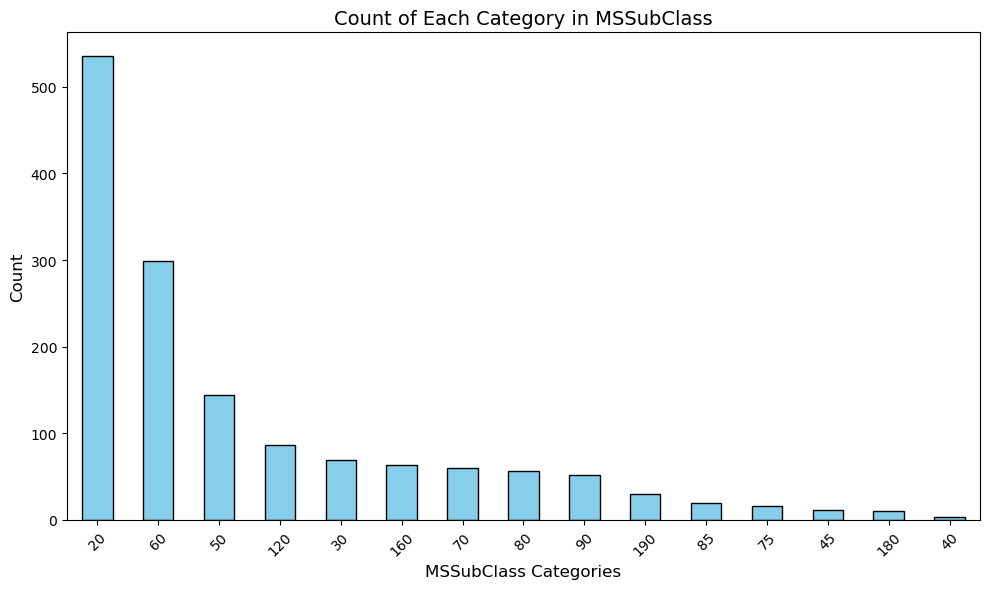

In [69]:
import matplotlib.pyplot as plt

# Get the value counts for the 'MSSubClass' column
category_counts = houses['MSSubClass'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in MSSubClass', fontsize=14)
plt.xlabel('MSSubClass Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

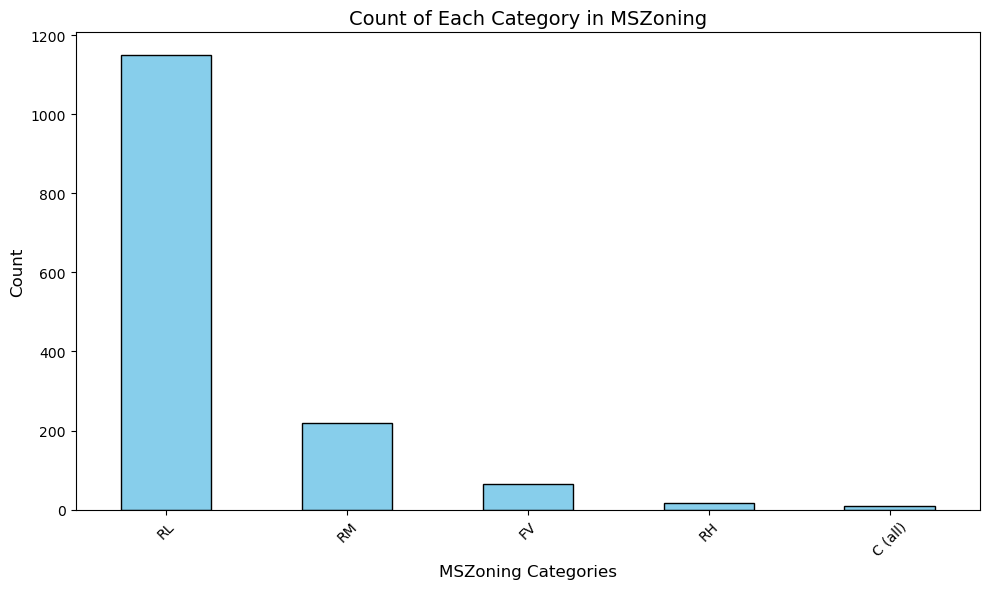

In [70]:
import matplotlib.pyplot as plt

# Get the value counts for the 'MSSubClass' column
category_counts = houses['MSZoning'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in MSZoning', fontsize=14)
plt.xlabel('MSZoning Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

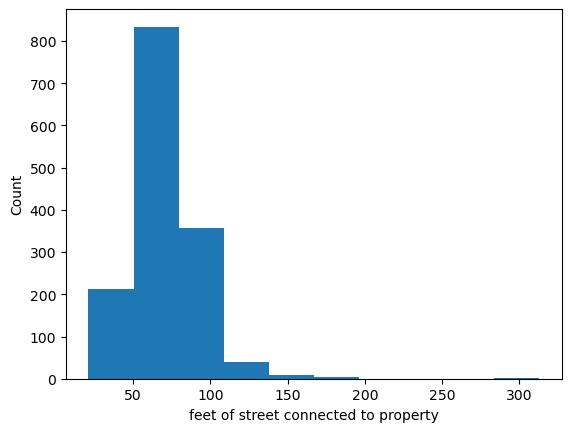

In [71]:
plt.hist(houses['LotFrontage'])
plt.xlabel('feet of street connected to property')
plt.ylabel('Count')

In [72]:
houses[houses['LotFrontage'] == 313.0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,No alley access,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NoMasVnr,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,True,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,True,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No Fence,None,0,1,2008,New,Partial,160000


In [73]:
houses = houses[houses['LotFrontage']!= 313.0]

In [74]:
houses = houses[houses['LotFrontage'] <= 150]

In [75]:
houses.shape

(1450, 81)

Text(0, 0.5, 'Count')

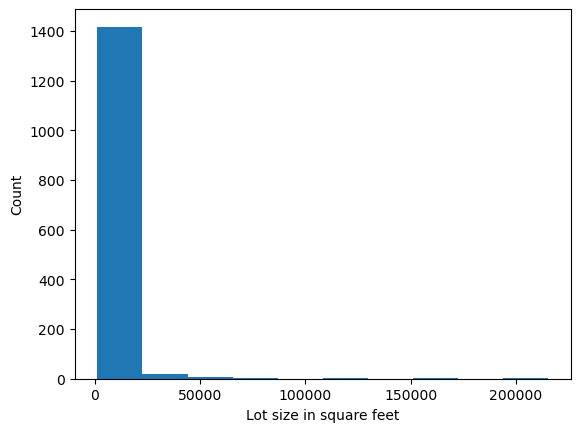

In [76]:
# They are all normal -> possible separation 
plt.hist(houses['LotArea'])
plt.xlabel('Lot size in square feet')
plt.ylabel('Count')

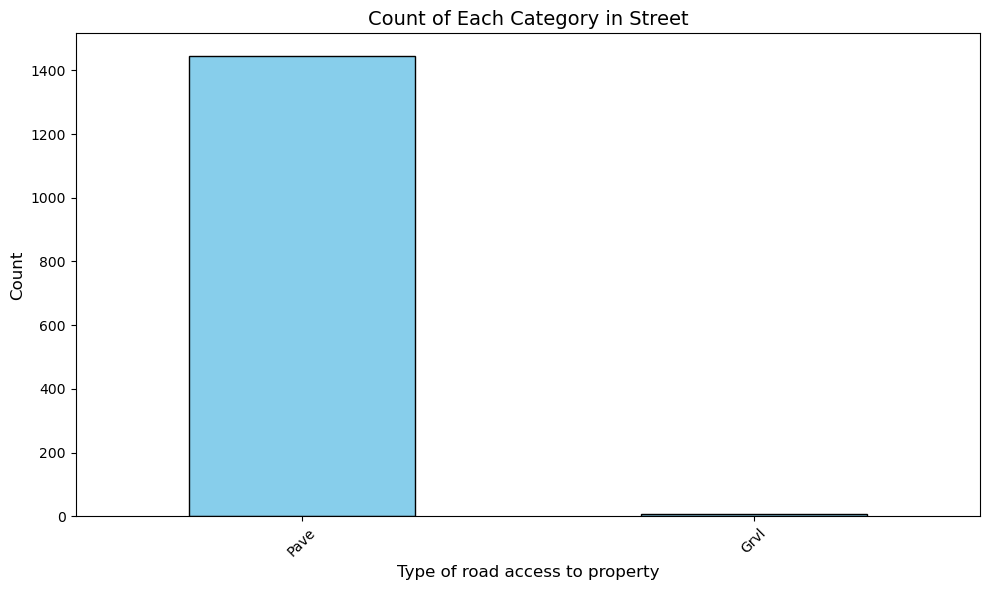

In [77]:
#Imabalanced column 

category_counts = houses['Street'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Street', fontsize=14)
plt.xlabel('Type of road access to property', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

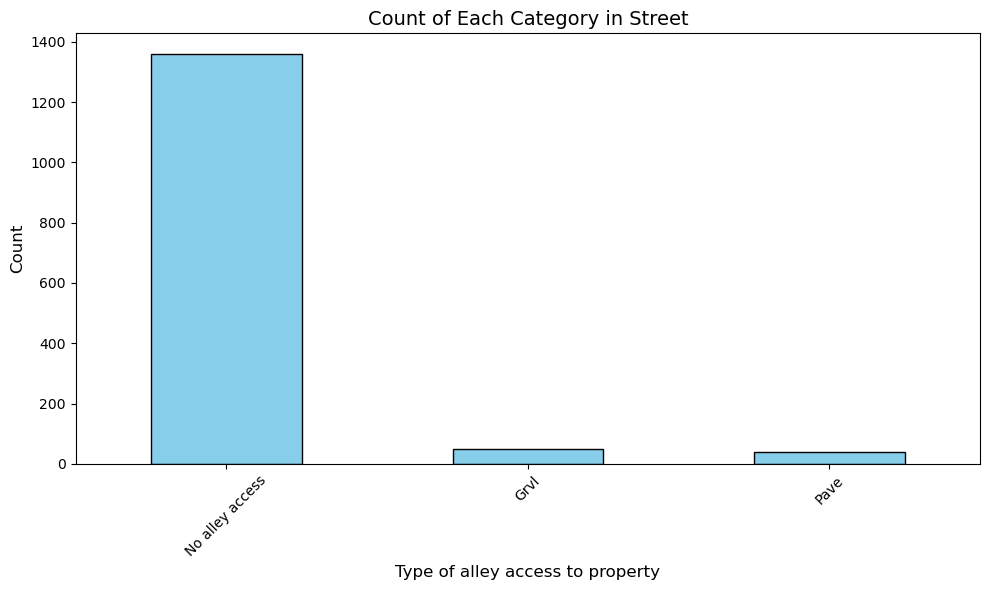

In [78]:

category_counts = houses['Alley'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Street', fontsize=14)
plt.xlabel('Type of alley access to property', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   int64  
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1450 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          1450 non-null   object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   int64  
 18  OverallCond  

Text(0, 0.5, 'Count')

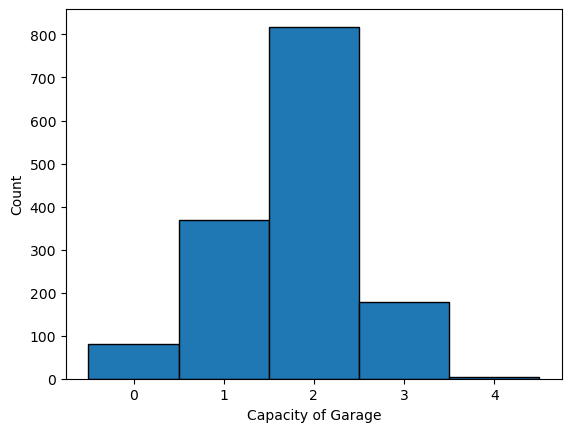

In [80]:
# There are so little number of carages that has the capacity of 4 cars
# Plot the histogram
plt.hist(houses['GarageCars'], bins=np.arange(houses['GarageCars'].min(), houses['GarageCars'].max() + 2) - 0.5, edgecolor='black')

# Set x-axis to show integer ticks
plt.xticks(np.arange(houses['GarageCars'].min(), houses['GarageCars'].max() + 1))

plt.xlabel('Capacity of Garage')
plt.ylabel('Count')

In [81]:
#Only 5 rows in around 1400 rows -> it seems better to drop them
houses[houses['GarageCars'] == 4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309,Unf,0,35,1344,GasA,Ex,True,SBrkr,1344,0,0,1344,2,0,2,0,2,2,TA,8,Typ,0,No Fireplace,Attchd,1997,Fin,4,784,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,NoMasVnr,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,False,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950,Unf,4,864,TA,TA,N,181,0,386,0,0,0,No Pool,No Fence,None,0,5,2009,WD,Normal,265979
1190,1191,190,RL,73.0,32463,Pave,No alley access,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,True,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,No Pool,No Fence,None,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,858,858,GasA,TA,True,SBrkr,872,0,0,872,0,0,1,0,3,1,TA,5,Typ,0,No Fireplace,Detchd,1974,Unf,4,480,TA,TA,Y,0,0,0,0,0,0,No Pool,GdWo,None,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500,Unf,0,748,1248,GasA,TA,True,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,TA,12,Typ,0,No Fireplace,Detchd,1969,Unf,4,968,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,8,2009,WD,Normal,200000


Text(0, 0.5, 'Count')

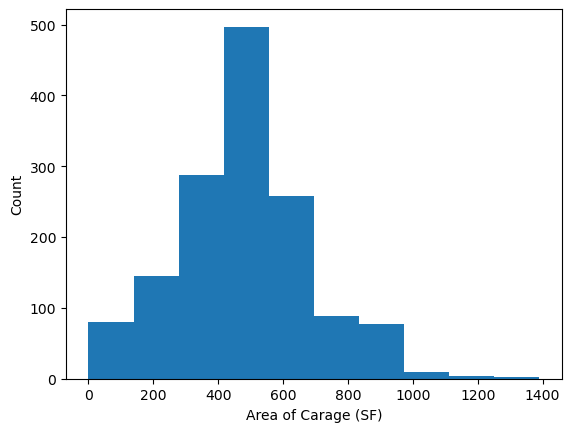

In [82]:
plt.hist(houses['GarageArea'])
plt.xlabel('Area of Carage (SF)')
plt.ylabel('Count')

In [83]:
#14 row >= 1000
#15 row >= 990
houses[houses['GarageArea'] >= 990]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,True,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,No Pool,No Fence,None,0,7,2009,New,Partial,501837
270,271,60,FV,84.0,10728,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1095,1095,GasA,Gd,True,SBrkr,1095,844,0,1939,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006,RFn,3,1053,TA,TA,Y,192,51,0,0,0,0,No Pool,No Fence,None,0,8,2006,New,Partial,266000
317,318,60,FV,75.0,9000,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1088,1088,GasA,Ex,True,SBrkr,1088,871,0,1959,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006,RFn,3,1025,TA,TA,Y,208,46,0,0,0,0,No Pool,No Fence,None,0,12,2007,WD,Normal,270000
581,582,20,RL,98.0,12704,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,True,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,No Pool,No Fence,None,0,8,2009,New,Partial,253293
664,665,20,RL,49.0,20896,Pave,No alley access,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,True,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,No Pool,No Fence,None,0,1,2006,New,Partial,423000
803,804,60,RL,107.0,13891,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,True,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,No Pool,No Fence,None,0,1,2009,New,Partial,582933
825,826,20,RL,114.0,14803,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,True,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,No Pool,No Fence,None,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,No alley access,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,True,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1994,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,No Pool,No Fence,Shed,560,8,2008,ConLD,Normal,81000
1087,1088,60,FV,85.0,10574,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1082,1082,GasA,Ex,True,SBrkr,1082,871,0,1953,0,0,2,1,3,1,Gd,9,Typ,1,Gd,

In [84]:
# Trying z-score 
# Calculate Z-scores
mean_garage = houses['GarageArea'].mean()
std_garage = houses['GarageArea'].std()
houses['Z_Score'] = (houses['GarageArea'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(14, 82)
(6, 82)


In [85]:
houses[np.abs(houses['Z_Score']) > 3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Z_Score
178,179,20,RL,63.0,17423,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,True,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,No Pool,No Fence,None,0,7,2009,New,Partial,501837,3.271876
581,582,20,RL,98.0,12704,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,True,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,No Pool,No Fence,None,0,8,2009,New,Partial,253293,4.327788
664,665,20,RL,49.0,20896,Pave,No alley access,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721,Unf,0,356,2077,GasA,Ex,True,SBrkr,2097,0,0,2097,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2005,Fin,3,1134,TA,TA,Y,192,267,0,0,0,0,No Pool,No Fence,None,0,1,2006,New,Partial,423000,3.121032
825,826,20,RL,114.0,14803,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,True,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,No Pool,No Fence,None,0,6,2008,New,Partial,385000,3.526426
1061,1062,30,C (all),120.0,18000,Grvl,No alley access,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,True,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,No Fireplace,Detchd,1994,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,No Pool,No Fence,Shed,560,8,2008,ConLD,Normal,81000,3.658415
1190,1191,190,RL,73.0,32463,Pave,No alley access,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,True,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,No Pool,No Fence,None,0,3,2007,WD,Normal,168000,4.167516


In [86]:
houses[np.abs(houses['Z_Score']) > 2] #114 row .. too many (?)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Z_Score
39,40,90,RL,65.0,6040,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NoMasVnr,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,False,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No Fireplace,No Garage,0,No Garage,0,0,No Garage,No Garage,N,0,0,0,0,0,0,No Pool,No Fence,None,0,6,2008,WD,AdjLand,82000,-2.224521
48,49,190,RM,33.0,4456,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,True,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No Fireplace,No Garage,0,No Garage,0,0,No Garage,No Garage,N,0,0,102,0,0,0,No Pool,No Fence,None,0,6,2009,New,Partial,113000,-2.224521
78,79,90,RL,72.0,10778,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,NoMasVnr,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,False,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No Fireplace,No Garage,0,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,4,2010,WD,Normal,136500,-2.224521
88,89,50,C (all),105.0,8470,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,NoMasVnr,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,False,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No Fireplace,No Garage,0,No Garage,0,0,No Garage,No Garage,N,0,0,156,0,0,0,No Pool,MnPrv,None,0,10,2009,ConLD,Abnorml,85000,-2.224521
89,90,20,RL,60.0,8070,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NoMasVnr,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,True,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,No Garage,0,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal,123600,-2.224521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,60,RL,91.0,16545,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,781,Unf,0,503,1284,GasA,Ex,True,SBrkr,1310,1140,0,2450,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998,Fin,3,1069,TA,TA,Y,0,126,0,0,0,0,No Pool,No Fence,None,0,5,2009,WD,Normal,340000,2.814629
1438,1439,20,RM,90.0,7407,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,NoMasVnr,0.0,TA,TA,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,TA,True,FuseA,1236,0,0,1236,1,0,1,0,2,1,TA,6,Typ,0,No Fireplace,Attchd,1957,Unf,2,923,TA,TA,Y,0,158,158,0,0,0,No Pool,MnPrv,None,0,4,2010,WD,Normal,149700,2.126401
1449,1450,180,RM,21.0,1533,Pave,No alley access,Reg,Lvl,AllPub,Inside,

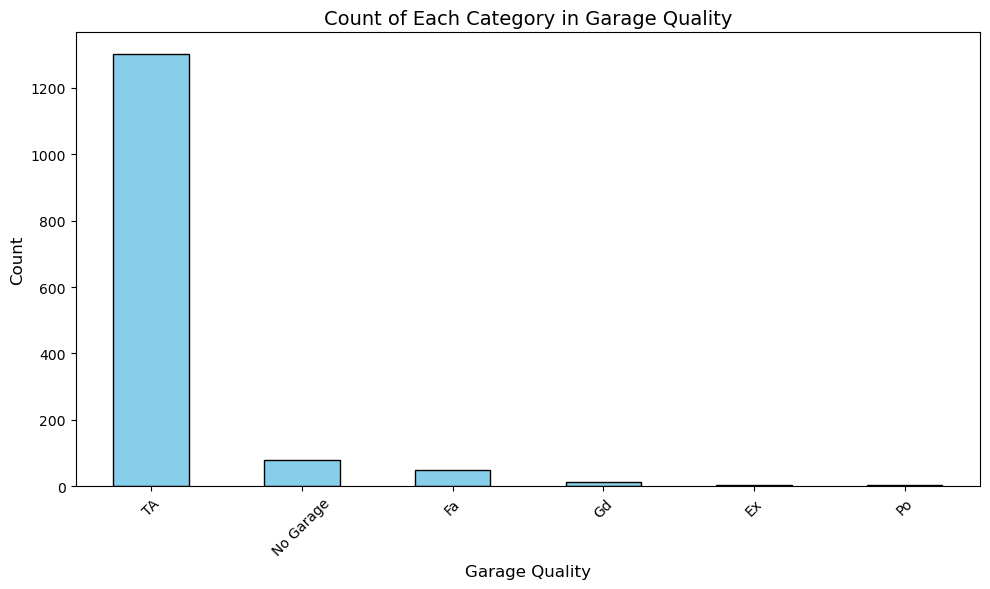

In [87]:

category_counts = houses['GarageQual'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Garage Quality', fontsize=14)
plt.xlabel('Garage Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
#Should delete them or consider them as imbalanced and do all the timbalanced columns together at the 
# same time?
category_counts

GarageQual
TA           1302
No Garage      80
Fa             48
Gd             14
Ex              3
Po              3
Name: count, dtype: int64

In [89]:
# Same here
houses['GarageCond'].value_counts()

GarageCond
TA           1317
No Garage      80
Fa             35
Gd              9
Po              7
Ex              2
Name: count, dtype: int64

In [90]:
houses['PavedDrive'].value_counts()

PavedDrive
Y    1331
N      89
P      30
Name: count, dtype: int64

Text(0, 0.5, 'Count')

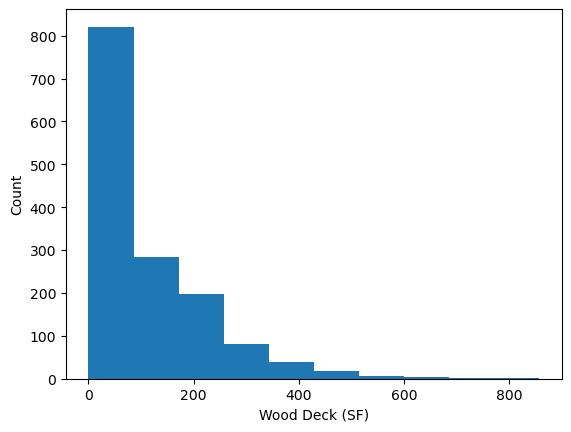

In [91]:
plt.hist(houses['WoodDeckSF'])
plt.xlabel('Wood Deck (SF)')
plt.ylabel('Count')

In [92]:
mean_garage = houses['WoodDeckSF'].mean()
std_garage = houses['WoodDeckSF'].std()
houses['Z_Score'] = (houses['WoodDeckSF'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(36, 82)
(22, 82)


In [93]:
houses[np.abs(houses['Z_Score']) > 2.5]['WoodDeckSF'].min()

409

In [94]:
houses[np.abs(houses['Z_Score']) > 3]['WoodDeckSF'].min()

474

Text(0, 0.5, 'Count')

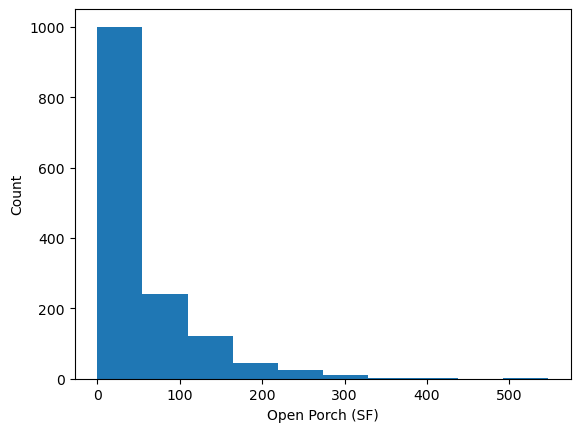

In [95]:
plt.hist(houses['OpenPorchSF'])
plt.xlabel('Open Porch (SF)')
plt.ylabel('Count')

In [96]:
mean_garage = houses['OpenPorchSF'].mean()
std_garage = houses['OpenPorchSF'].std()
houses['Z_Score'] = (houses['OpenPorchSF'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(44, 82)
(26, 82)


In [97]:
houses[np.abs(houses['Z_Score']) > 2.5]['OpenPorchSF'].min()

213

In [98]:
houses[np.abs(houses['Z_Score']) > 3]['OpenPorchSF'].min()

247

In [99]:
houses[np.abs(houses['Z_Score']) > 4]['OpenPorchSF'].min()

312

Text(0, 0.5, 'Count')

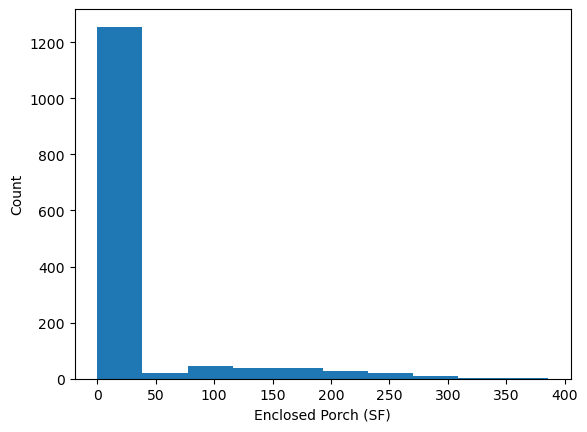

In [100]:
plt.hist(houses['EnclosedPorch'])
plt.xlabel('Enclosed Porch (SF)')
plt.ylabel('Count')

In [101]:
mean_garage = houses['EnclosedPorch'].mean()
std_garage = houses['EnclosedPorch'].std()
houses['Z_Score'] = (houses['EnclosedPorch'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(79, 82)
(53, 82)


In [102]:
houses[np.abs(houses['Z_Score']) >3]['EnclosedPorch'].min()

202

Text(0, 0.5, 'Count')

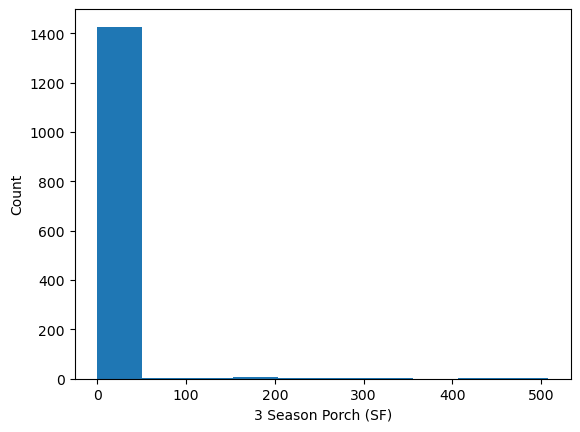

In [103]:
plt.hist(houses['3SsnPorch'])
plt.xlabel('3 Season Porch (SF)')
plt.ylabel('Count')

In [104]:
mean_garage = houses['3SsnPorch'].mean()
std_garage = houses['3SsnPorch'].std()
houses['Z_Score'] = (houses['3SsnPorch'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(23, 82)
(23, 82)


In [105]:
houses[np.abs(houses['Z_Score']) > 3]['3SsnPorch'].min()

96

Text(0, 0.5, 'Count')

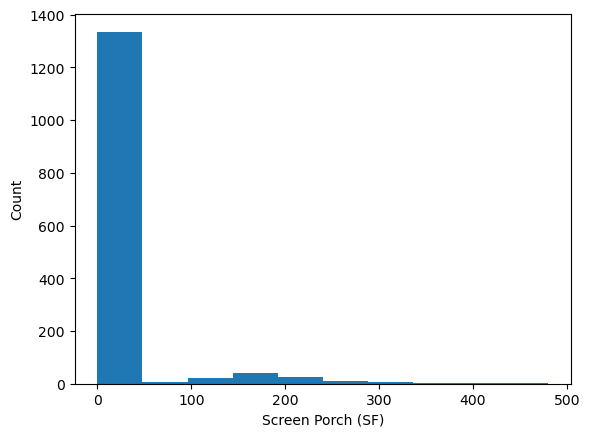

In [106]:
plt.hist(houses['ScreenPorch'])
plt.xlabel('Screen Porch (SF)')
plt.ylabel('Count')

In [107]:
mean_garage = houses['ScreenPorch'].mean()
std_garage = houses['ScreenPorch'].std()
houses['Z_Score'] = (houses['ScreenPorch'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(76, 82)
(55, 82)


In [108]:
houses[np.abs(houses['Z_Score']) > 3]['ScreenPorch'].min()

184

Text(0, 0.5, 'Count')

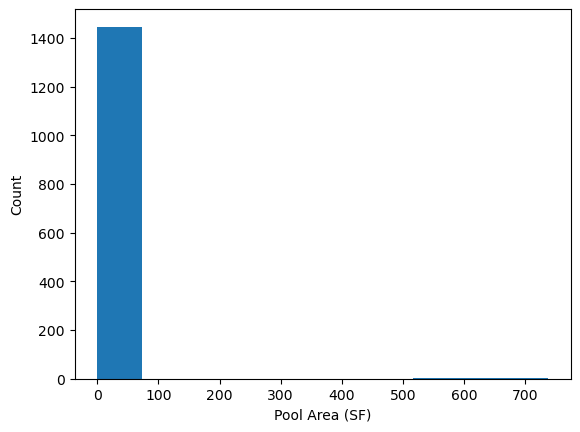

In [109]:
# A lot of houses don't have pools.. Should we drop the column?
plt.hist(houses['PoolArea'])
plt.xlabel('Pool Area (SF)')
plt.ylabel('Count')

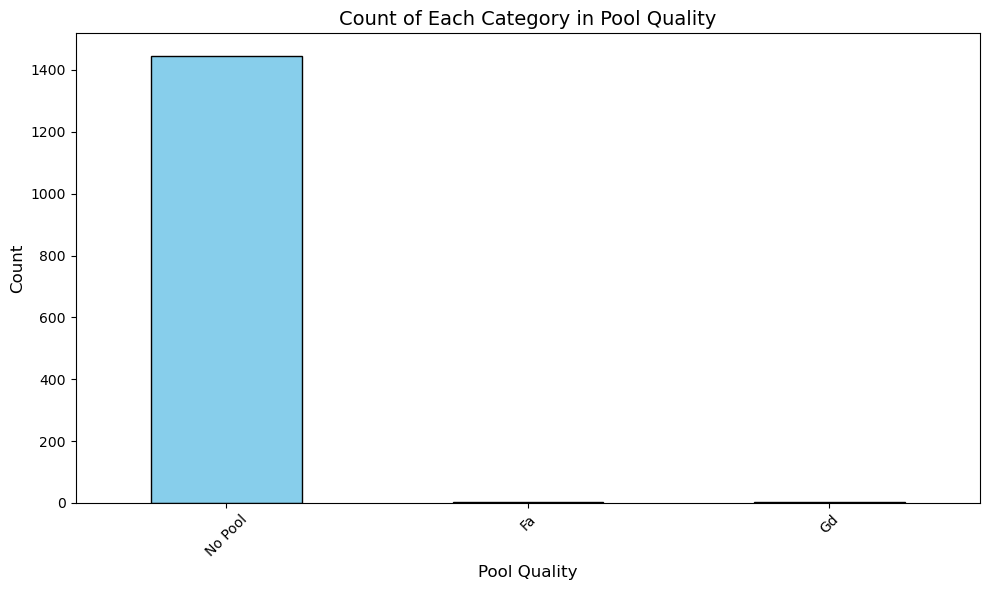

In [110]:
#imbalanced -> Drop (?)
category_counts = houses['PoolQC'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Pool Quality', fontsize=14)
plt.xlabel('Pool Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

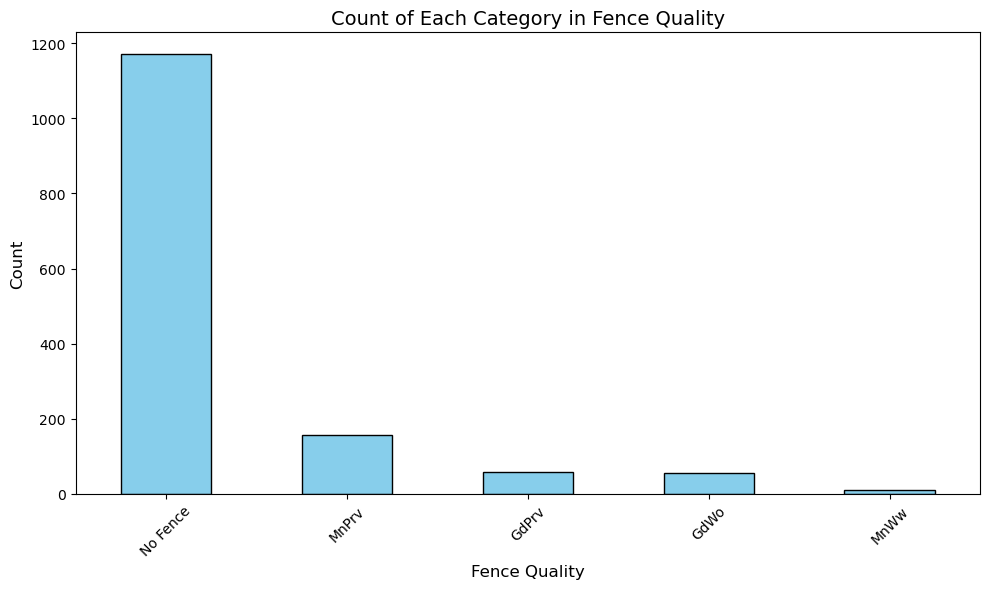

In [111]:
# imbalanced
category_counts = houses['Fence'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Fence Quality', fontsize=14)
plt.xlabel('Fence Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

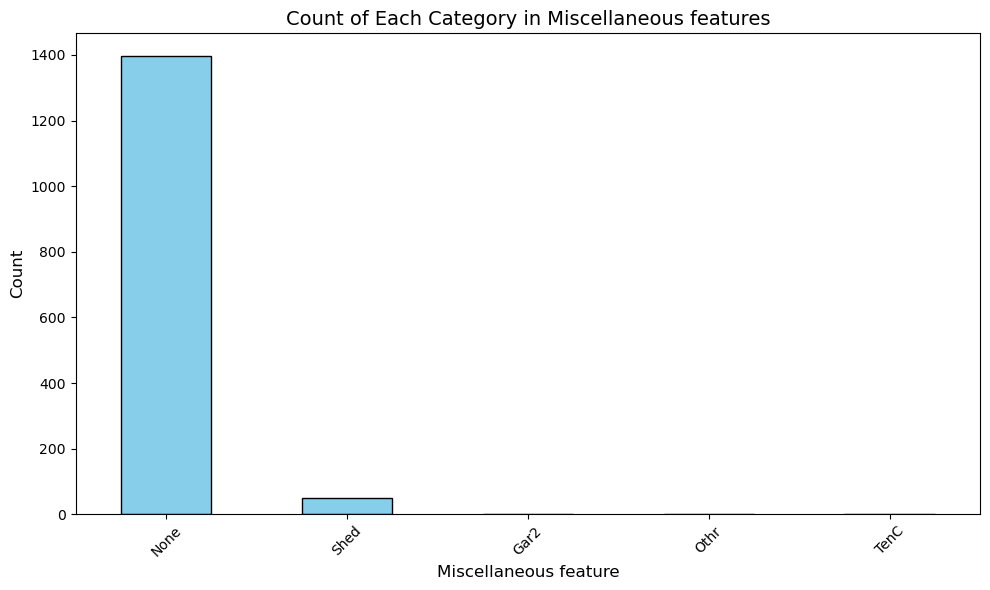

In [112]:

category_counts = houses['MiscFeature'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Miscellaneous features', fontsize=14)
plt.xlabel('Miscellaneous feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
#.. should we drop them?
houses['MiscFeature'].value_counts()

MiscFeature
None    1396
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

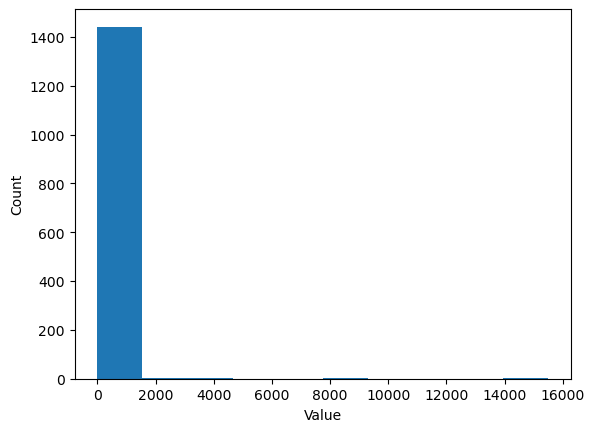

In [114]:
plt.hist(houses['MiscVal'])
plt.xlabel('Value')
plt.ylabel('Count')

In [115]:
houses['MiscVal'].value_counts()

MiscVal
0        1398
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [116]:
mean_garage = houses['3SsnPorch'].mean()
std_garage = houses['3SsnPorch'].std()
houses['Z_Score'] = (houses['3SsnPorch'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(23, 82)
(23, 82)


Text(0, 0.5, 'Count')

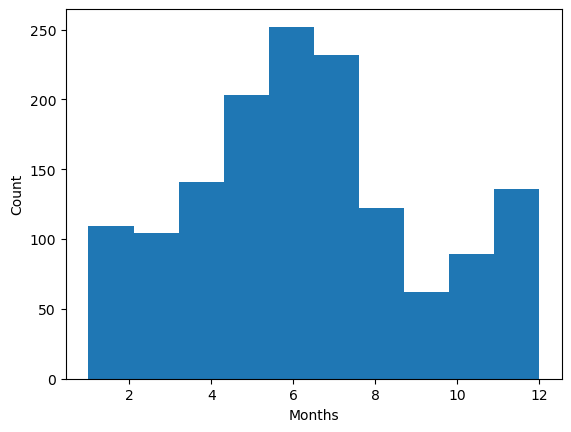

In [117]:
#Normal
plt.hist(houses['MoSold'])
plt.xlabel('Months')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

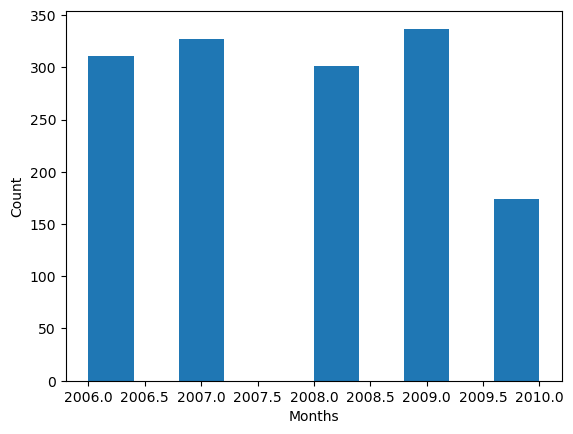

In [118]:
#Normal
plt.hist(houses['YrSold'])
plt.xlabel('Months')
plt.ylabel('Count')

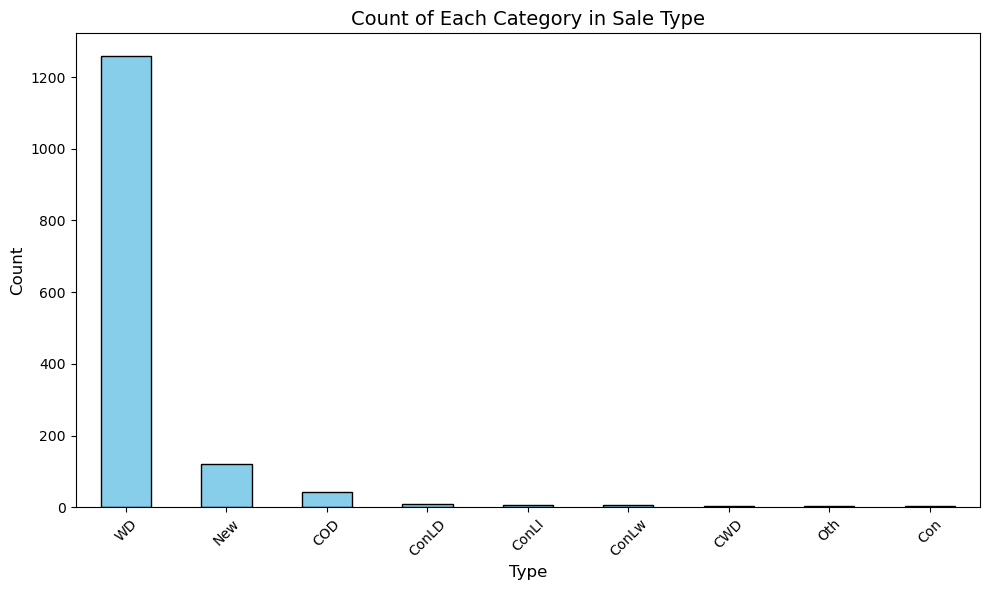

In [119]:

category_counts = houses['SaleType'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Sale Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
houses['SaleType'].value_counts()

SaleType
WD       1259
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

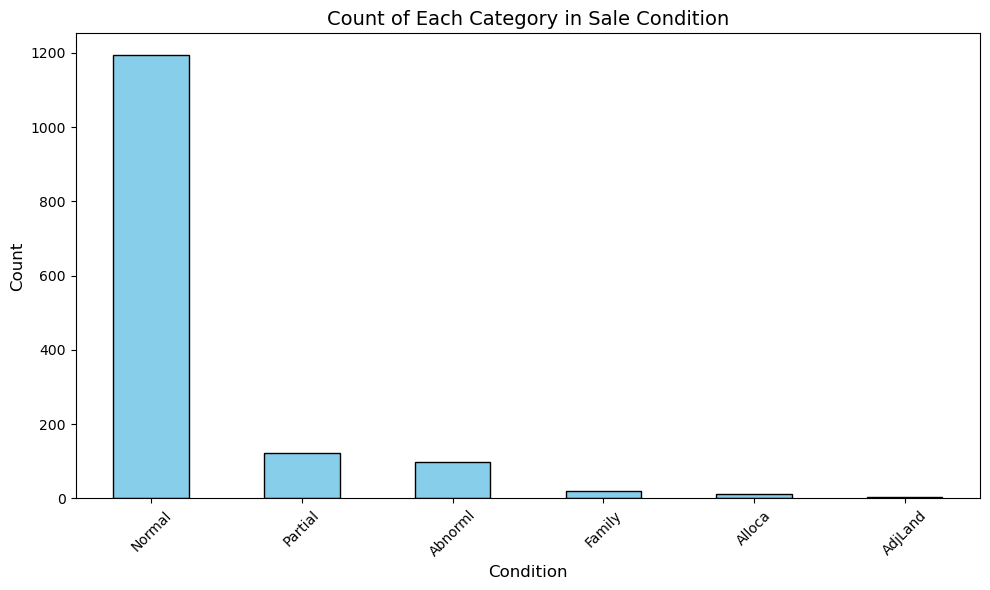

In [121]:

category_counts = houses['SaleCondition'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Count of Each Category in Sale Condition', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
houses['SaleCondition'].value_counts()

SaleCondition
Normal     1193
Partial     123
Abnorml      99
Family       19
Alloca       12
AdjLand       4
Name: count, dtype: int64

Text(0, 0.5, 'Count')

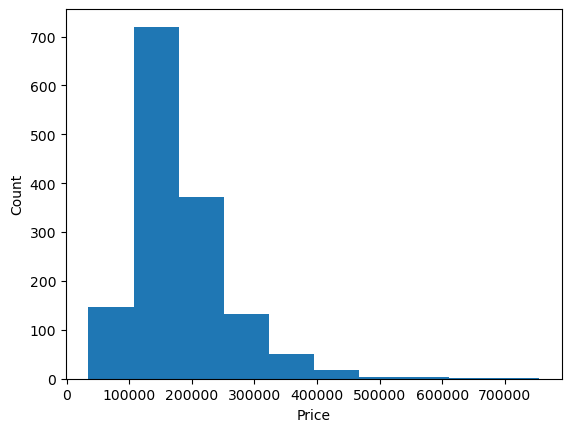

In [123]:
#Normal
plt.hist(houses['SalePrice'])
plt.xlabel('Price')
plt.ylabel('Count')

In [124]:
mean_garage = houses['SalePrice'].mean()
std_garage = houses['SalePrice'].std()
houses['Z_Score'] = (houses['SalePrice'] - mean_garage) / std_garage

# Identify outliers (Z-score > 3 or < -3)
outliers = houses[np.abs(houses['Z_Score']) > 3]

#print(outliers.shape)
print(houses[np.abs(houses['Z_Score']) > 2.5].shape) # prefer this one
print(houses[np.abs(houses['Z_Score']) > 3].shape)

(41, 82)
(22, 82)


In [125]:
houses[np.abs(houses['Z_Score']) > 3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Z_Score
58,59,60,RL,66.0,13682,Pave,No alley access,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,True,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,No Pool,No Fence,None,0,10,2006,New,Partial,438780,3.316569
178,179,20,RL,63.0,17423,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,True,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,No Pool,No Fence,None,0,7,2009,New,Partial,501837,4.125671
185,186,75,RM,90.0,22950,Pave,No alley access,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NoMasVnr,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,True,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,No Pool,GdPrv,None,0,6,2006,WD,Normal,475000,3.781318
278,279,20,RL,107.0,14450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,2121,2121,GasA,Ex,True,SBrkr,2121,0,0,2121,0,0,2,1,3,1,Ex,8,Typ,1,Ex,Attchd,2007,Fin,3,732,TA,TA,Y,124,98,0,0,142,0,No Pool,No Fence,None,0,5,2007,New,Partial,415298,3.015264
349,350,60,RL,56.0,20431,Pave,No alley access,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,0,438,1848,GasA,Ex,True,SBrkr,1848,880,0,2728,1,0,2,1,4,1,Ex,10,Typ,2,Ex,Attchd,2006,Fin,3,706,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,None,0,4,2006,New,Partial,437154,3.295705
389,390,60,RL,96.0,12474,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,True,SBrkr,1742,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,Ex,BuiltIn,2008,Fin,3,846,TA,TA,Y,196,134,0,0,0,0,No Pool,No Fence,None,0,8,2008,New,Partial,426000,3.152585
440,441,20,RL,105.0,15431,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,True,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,No Pool,No Fence,None,0,4,2009,WD,Normal,555000,4.807821
473,474,20,RL,110.0,14977,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,304.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1350,Unf,0,626,1976,GasA,Ex,True,SBrkr,1976,0,0,1976,1,0,2,0,2,1,Gd,7,Typ,1,Ex,Attchd,2006,RFn,3,908,TA,TA,Y,250,63,0,0,0,0,No Pool,No Fence,None,0,7,2007,New,Partial,440000,3.332223
496,497,20,RL,91.0,12692,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,NoMasVnr,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,U

# Test Dataset

## uniqueness 

In [126]:
houses_test.duplicated().sum()

0

In [127]:
houses_test['Id'].duplicated().sum()

0

## Completeness

In [128]:
pd.set_option('display.max_rows', None)
houses_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [129]:
houses_test[houses_test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,NaN,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [130]:
houses_test['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [131]:
houses_test[houses_test['MasVnrType'].isna()].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [132]:
houses_test[houses_test['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,59.0,15810,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,NaN,11950,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,85.0,9965,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,FV,112.0,12217,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,Na

In [133]:
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [134]:
houses_test[houses_test['BsmtQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
397,1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1114,1114,0,2228,0.0,0.0,2,0,6,2,TA,8,Typ,0,NaN,Detchd,1979.0,Unf,2.0,720.0,TA,TA,Y,73,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
398,1859,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,N

In [135]:
# Columns with problems
houses_test[(houses_test['BsmtCond'].isnull()) & (~houses_test['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
580,2041,20,RL,103.0,16280,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
725,2186,20,RL,65.0,6500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1064,2525,80,RL,72.0,9720,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal


In [136]:
# No -> No Exposure
# NaN -> No Basement
# A probelm in 888
houses_test[houses_test['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
27,1488,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
397,1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,

In [137]:
houses_test[houses_test['BsmtFinType1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
397,1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1114,1114,0,2228,0.0,0.0,2,0,6,2,TA,8,Typ,0,NaN,Detchd,1979.0,Unf,2.0,720.0,TA,TA,Y,73,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
398,1859,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,N

In [138]:
houses_test[houses_test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [139]:
houses_test[houses_test['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
125,1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
269,1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
318,1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
354,1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
388,1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
397,1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1114,1114,0,2228,0.0,0.0,2,0,6,2,TA,8,Typ,0,NaN,Detchd,1979.0,Unf,2.0,720.0,TA,TA,Y,73,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
398,1859,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,N

In [140]:
houses_test[houses_test['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


#BsmtExposure       44
#BsmtFinType1       42
#BsmtFinSF1          1
#BsmtFinType2       42
#BsmtFinSF2          1
#BsmtUnfSF           1
#TotalBsmtSF         1
#Dropping (?)
houses_test.drop(691)
# fill NaN as None
houses_test['MasVnrType'] = houses_test['MasVnrType'].fillna('None')
houses_test['MasVnrArea'] = houses_test['MasVnrArea'].fillna(0)
# A problem in 757 and 758
# houses_test.loc[[757, 758], 'BsmtQual'] = 'Unknown'
houses_test['BsmtQual'] = houses_test['BsmtQual'].fillna('No Basement')
# houses_test.loc[[580, 725, 1064], 'BsmtCond'] = 'Unknown'
houses_test['BsmtCond'] = houses_test['BsmtCond']fillna('No Basement')
# houses_test.loc[888, 'BsmtExposure'] = 'Unknown'
houses_test['BsmtExposure'] = houses_test['BsmtExposure'].fillna('No Basement')
houses_test['BsmtFinType1'] = houses_test['BsmtFinType1'].fillna('No Basement')
houses_test['BsmtFinSF1'] = houses_test['BsmtFinSF1'].fillna(0.0)
houses_test['BsmtFinType2'] = houses_test['BsmtFinType2'].fillna('No Basement')
houses_test['BsmtFinSF2'] = houses_test['BsmtFinSF2'].fillna(0.0)
houses_test['BsmtUnfSF'] = houses_test['BsmtUnfSF'].fillna(0.0)
houses_test['TotalBsmtSF'] = houses_test['TotalBsmtSF'].fillna(0.0)


In [141]:
#houses= houses[houses['MasVnrArea'] < 1000]

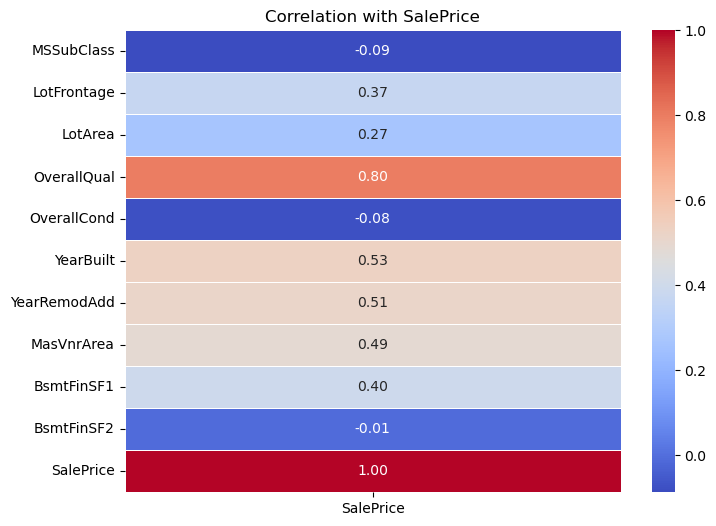

In [143]:
# Select relevant columns including 'SalePrice'
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']

# Create a correlation matrix
corr_matrix = houses[cols].corr()

# Filter only correlations with 'SalePrice'
corr_with_saleprice = corr_matrix[['SalePrice']]

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_saleprice, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation with SalePrice')
plt.show()

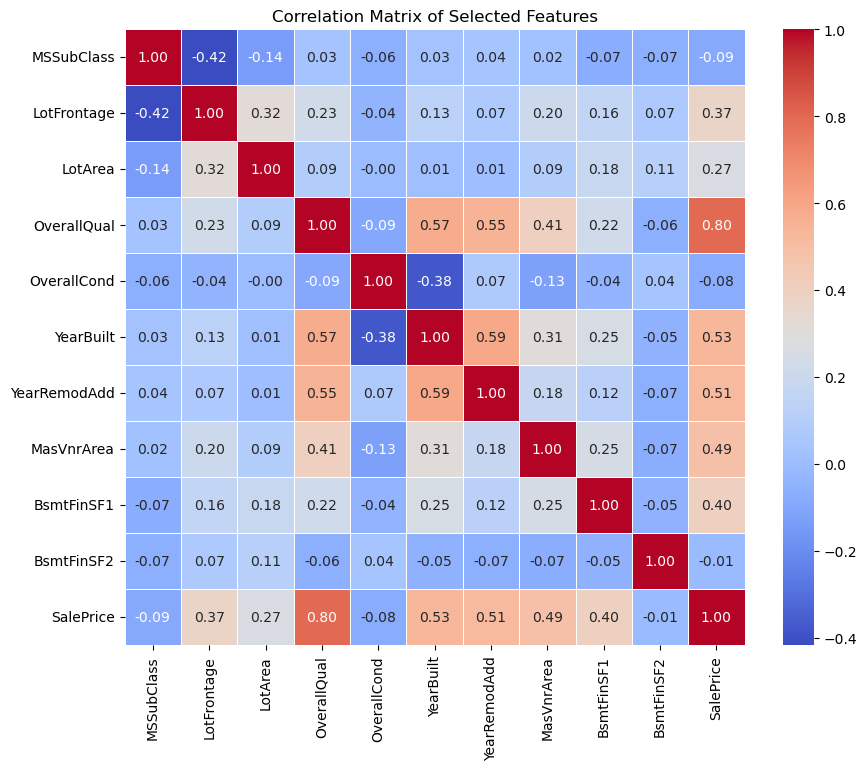

In [144]:
# Select the relevant columns
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']

# Compute the correlation matrix
corr_matrix = houses[cols].corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix of Selected Features')
plt.show()

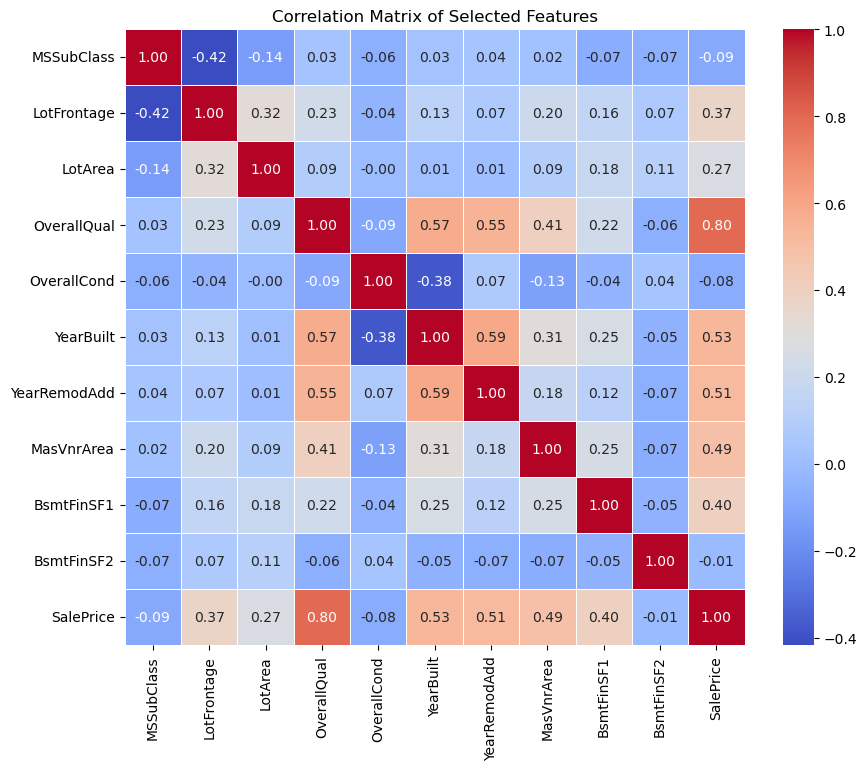

In [145]:
# Select the relevant columns
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']

# Compute the correlation matrix
corr_matrix = houses[cols].corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
numeric_cols.shape

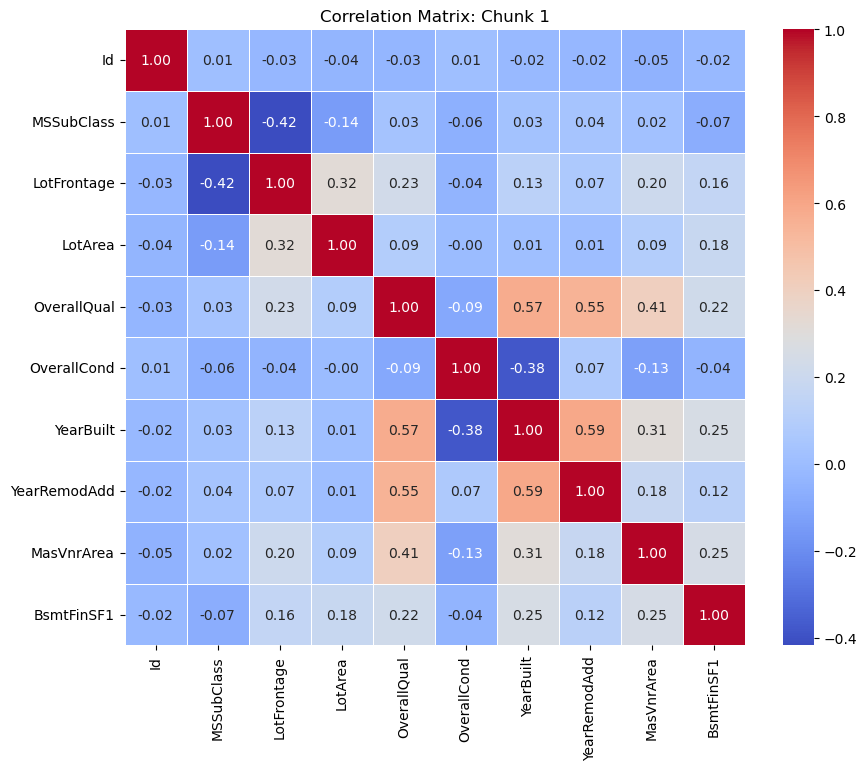

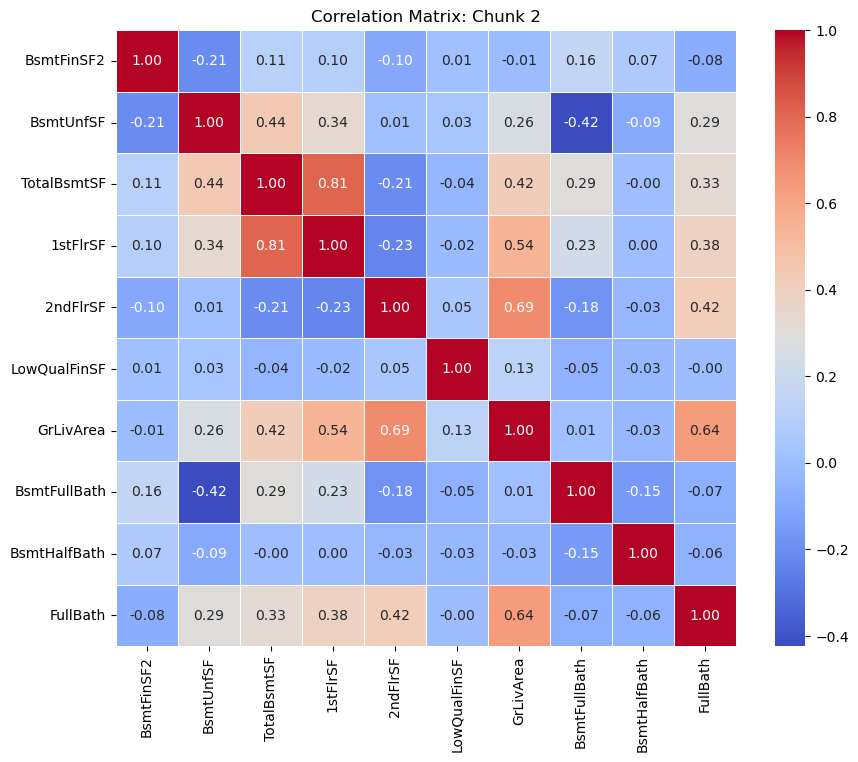

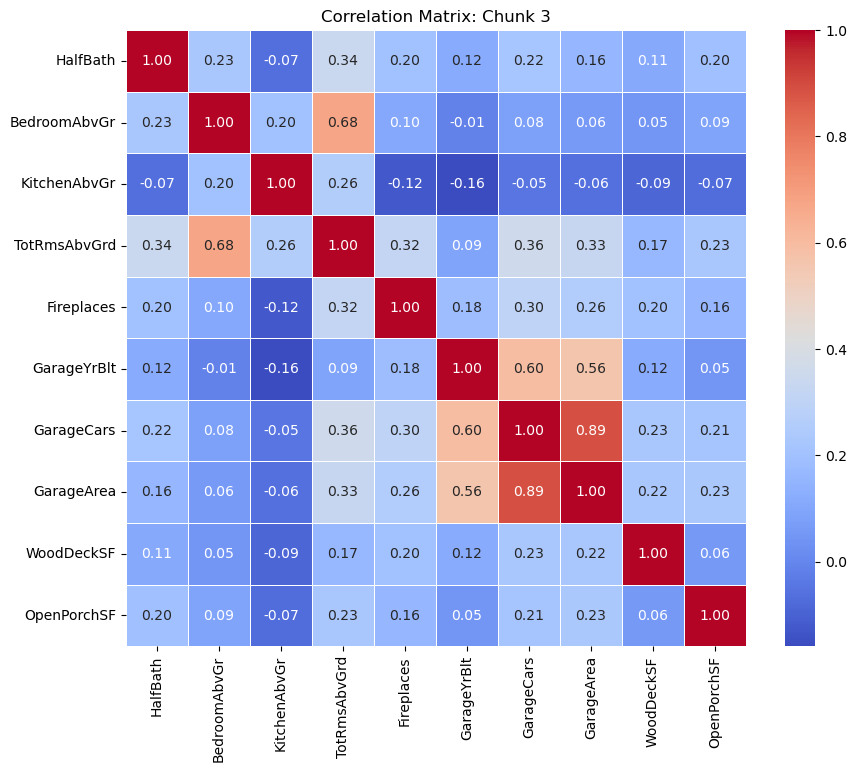

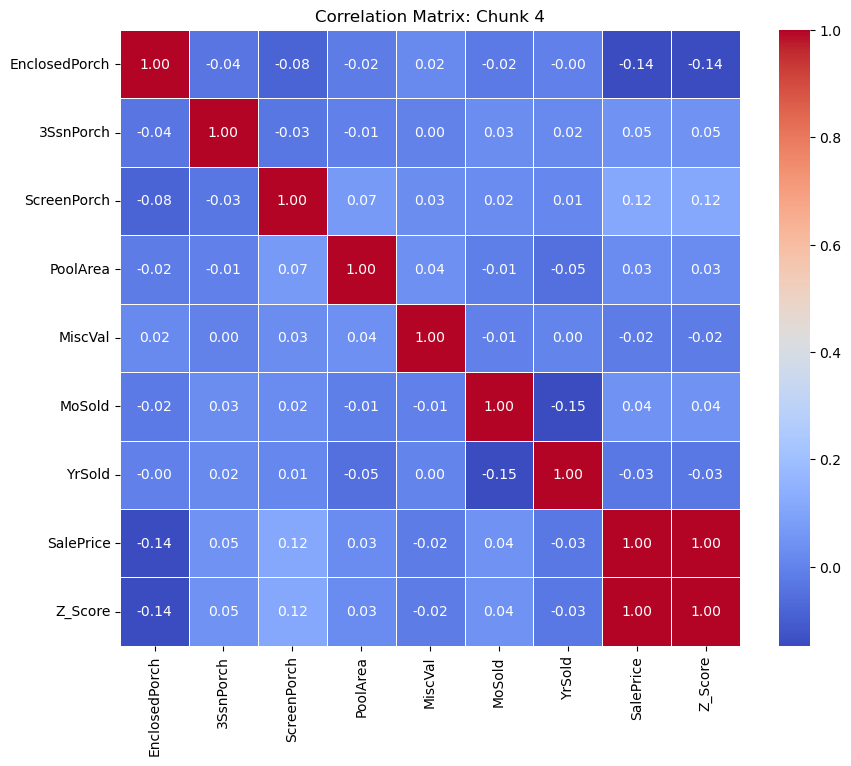

In [146]:
numeric_cols = houses.select_dtypes(include='number')

# Split numeric columns into chunks of 10
num_chunks = [numeric_cols.iloc[:, i:i+10] for i in range(0, len(numeric_cols.columns), 10)]

# Function to plot a heatmap
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title(title)
    plt.show()

# Plot correlation matrices for each chunk
for i, chunk in enumerate(num_chunks):
    plot_heatmap(chunk, f'Correlation Matrix: Chunk {i + 1}')

In [148]:
houses_no_corr = houses.drop(columns={'1stFlrSF','2ndFlrSF', 'GarageCars'}, axis=1)

In [149]:
houses_no_corr.shape

(1450, 79)

In [150]:
houses_no_corr = houses.drop(columns={'Z_Score'}, axis=1)

In [152]:
houses_no_corr.shape

(1450, 81)

## Outliers  

# Models 

In [157]:
model_log = LogisticRegression()
model_lasso = Lasso()
model_ridge = Ridge()

In [160]:
X = houses_no_corr.drop({'SalePrice'}, axis=1)
y = houses_no_corr['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)